In [47]:
var = """ #Part 1: Data Handling with Pandas (Basic)
import pandas as pd

# Load the dataset into a Pandas DataFrame
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

# Display the first few rows of the dataset
def display_data(df):
    print(df.head())

# Handle missing values (if any)
def handle_missing_values(df):
    # Fill missing values with zeros or remove rows with missing values
    df = df.fillna(0)
    # Alternatively, you could drop rows with missing values: df.dropna(inplace=True)
    return df  """


In [48]:
# Part 2: Implementing OOP Concepts (Intermediate)
class SalesDataProcessor:
    def __init__(self, df=None):
        # Initialize with an optional DataFrame
        self.df = df
    
    # Method to load the dataset
    def load_data(self, file_path):
        self.df = pd.read_csv(file_path)
    
    # Method to clean data (handling missing values and converting data types)
    def clean_data(self):
        self.df = self.df.fillna(0)  # Filling missing values with 0
        self.df['Date'] = pd.to_datetime(self.df['Date'])  # Ensuring Date column is in datetime format
        self.df['TotalPrice'] = self.df['Quantity'] * self.df['PricePerUnit']  # Recalculating TotalPrice
        return self.df
    
    # Adding display_data method
    def display_data(self):
        print(self.df.head())  # Display the first few rows of the DataFrame
    
    # Method to get total sales (sum of TotalPrice)
    def get_total_sales(self):
        return self.df['TotalPrice'].sum()
    
    # Method to get a list of unique products
    def get_unique_products(self):
        return self.df['Product'].unique()
    
    # Method to get total sales per product category
    def get_sales_by_category(self):
        return self.df.groupby('Category')['TotalPrice'].sum()
    
    # Method to get the top-selling product
    def get_top_selling_product(self):
        total_sales_per_product = self.df.groupby('Product')['TotalPrice'].sum()
        return total_sales_per_product.idxmax(), total_sales_per_product.max()

In [49]:
# Part 3: Extending OOP with Inheritance (Advanced)
class CustomerSalesProcessor(SalesDataProcessor):
    def __init__(self, df=None):
        super().__init__(df)
    
    # Method to get total sales by a specific customer
    def get_total_sales_by_customer(self, customer_id):
        customer_sales = self.df[self.df['CustomerID'] == customer_id]
        return customer_sales['TotalPrice'].sum()
    
    # Method to get the top n customers who made the most purchases
    def get_frequent_customers(self, n):
        customer_purchase_counts = self.df.groupby('CustomerID').size()
        frequent_customers = customer_purchase_counts.nlargest(n)
        return frequent_customers
    
    # Method to get total sales per city
    def get_sales_by_city(self):
        return self.df.groupby('City')['TotalPrice'].sum()

In [50]:
# Part 4: Data Visualization (Bonus)
import matplotlib.pyplot as plt
import seaborn as sns

# Method to plot a bar chart showing total sales by category
def plot_sales_by_category(df):
    sales_by_category = df.groupby('Category')['TotalPrice'].sum().sort_values()
    sales_by_category.plot(kind='bar', color='skyblue')
    plt.title('Total Sales by Category')
    plt.xlabel('Category')
    plt.ylabel('Total Sales')
    plt.show()

# Method to plot a line graph of daily sales trends
def plot_sales_trends(df):
    daily_sales = df.groupby('Date')['TotalPrice'].sum()
    daily_sales.plot(kind='line', color='green')
    plt.title('Daily Sales Trends')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.show()

# Method to plot a pie chart showing the percentage contribution of different cities to total sales
def plot_sales_by_city(df):
    sales_by_city = df.groupby('City')['TotalPrice'].sum()
    sales_by_city.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
    plt.title('Sales by City')
    plt.ylabel('')
    plt.show()

   OrderID     Product     Category  Quantity  PricePerUnit  TotalPrice  \
0     1001      Laptop  Electronics         1         60000       60000   
1     1002  Smartphone  Electronics         2         20000       40000   
2     1003       Jeans     Clothing         3          1500        4500   
3     1004      LED TV  Electronics         1         45000       45000   
4     1005       Kurta     Clothing         4           800        3200   

        Date CustomerID       City  
0 2024-01-01       C001     Mumbai  
1 2024-01-02       C002      Delhi  
2 2024-01-03       C003  Bengaluru  
3 2024-01-04       C004  Hyderabad  
4 2024-01-05       C005    Chennai  
Total Sales: 359100
Unique Products: ['Laptop' 'Smartphone' 'Jeans' 'LED TV' 'Kurta' 'Washing Machine'
 'Mixer Grinder' 'Sports Shoes' 'Microwave' 'Earphones' 'Refrigerator'
 'Sandals' 'Tablet' 'Hoodie' 'Air Fryer' 'Chappal' 'Smartwatch' 'Saree'
 'Jacket' 'Toaster']
Sales by Category:
Category
Appliances     114000
Clothing  

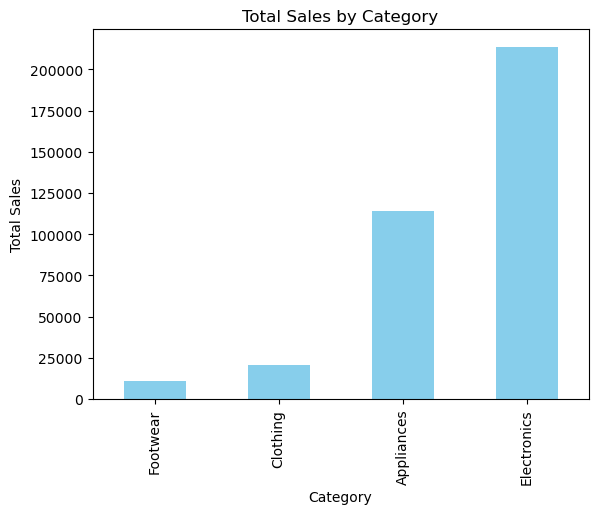

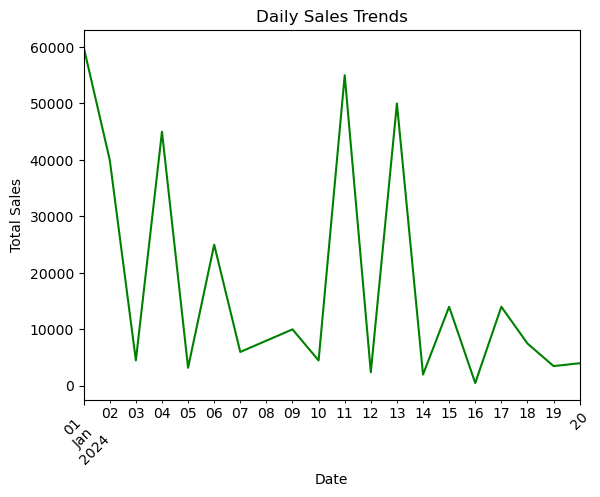

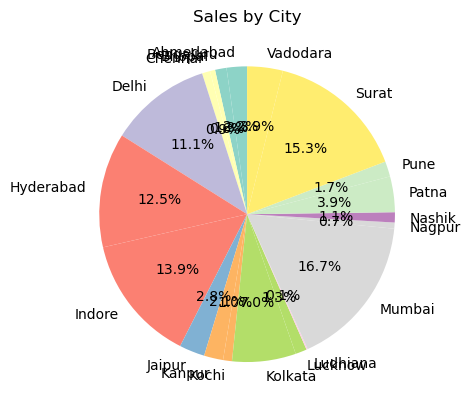

In [51]:
# Create an instance of the SalesDataProcessor class
processor = SalesDataProcessor()

# Load the data
file_path = 'Week8_sales_data_india.csv'
processor.load_data(file_path)

# Clean the data
processor.clean_data()

# Display the first few rows
processor.display_data()

# Get total sales
total_sales = processor.get_total_sales()
print(f"Total Sales: {total_sales}")

# Get unique products
unique_products = processor.get_unique_products()
print(f"Unique Products: {unique_products}")

# Get sales by category
sales_by_category = processor.get_sales_by_category()
print(f"Sales by Category:\n{sales_by_category}")

# Get the top-selling product
top_product, top_sales = processor.get_top_selling_product()
print(f"Top Selling Product: {top_product} with Sales: {top_sales}")

# Create an instance of the CustomerSalesProcessor class
customer_processor = CustomerSalesProcessor(processor.df)

# Get total sales by a specific customer (example: customer ID 123)
customer_sales = customer_processor.get_total_sales_by_customer(123)
print(f"Total Sales by Customer 123: {customer_sales}")

# Get top 5 frequent customers
frequent_customers = customer_processor.get_frequent_customers(5)
print(f"Top 5 Frequent Customers:\n{frequent_customers}")

# Get sales by city
sales_by_city = customer_processor.get_sales_by_city()
print(f"Sales by City:\n{sales_by_city}")

# Data visualization
plot_sales_by_category(processor.df)
plot_sales_trends(processor.df)
plot_sales_by_city(processor.df)